<a href="https://colab.research.google.com/github/Muppasanipraneeth/Machine_learningProjects/blob/main/motherFetus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix


In [9]:
import pandas as pd

# Load the Excel file
file_name = '/content/CTG.xls'

# Convert each sheet to CSV
excel_data = pd.ExcelFile(file_name)
for sheet in excel_data.sheet_names:
    df = excel_data.parse(sheet)
    csv_file_name = f"/content/{sheet}.csv"
    df.to_csv(csv_file_name, index=False)
    print(f"Converted {sheet} to {csv_file_name}")


Converted Description to /content/Description.csv
Converted Data to /content/Data.csv
Converted Raw Data to /content/Raw Data.csv


In [10]:
data = pd.read_csv('/content/Data.csv', header=1)
data_clean = data.loc[:, ~data.columns.str.contains('^Unnamed')]
data_clean


,b,e,AC,FM,UC,DL,DS,DP,DR,LB,...,C,D,E,AD,DE,LD,FS,SUSP,CLASS,NSP
0,240.0,357.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,120.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,9.0,2.0
1,5.0,632.0,4.0,0.0,4.0,2.0,0.0,0.0,0.0,132.0,...,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,6.0,1.0
2,177.0,779.0,2.0,0.0,5.0,2.0,0.0,0.0,0.0,133.0,...,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,6.0,1.0
3,411.0,1192.0,2.0,0.0,6.0,2.0,0.0,0.0,0.0,134.0,...,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,6.0,1.0
4,533.0,1147.0,4.0,0.0,5.0,0.0,0.0,0.0,0.0,132.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2124,1576.0,3049.0,1.0,0.0,9.0,0.0,0.0,0.0,0.0,140.0,...,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,5.0,2.0
2125,2796.0,3415.0,1.0,1.0,5.0,0.0,0.0,0.0,0.0,142.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,1.0
2126,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2127,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,...,53.0,81.0,72.0,332.0,252.0,107.0,69.0,197.0,NaN,NaN


In [11]:
description=pd.read_csv('/content/Description.csv')
description
data_cleaned = description[['Cardiotocographic data', 'Unnamed: 3']]
data_cleaned.columns = ['Variable', 'Description']
data_cleaned = data_cleaned.iloc[5:].reset_index(drop=True)
data_cleaned = data_cleaned.iloc[:38].reset_index(drop=True)
data_cleaned



,Variable,Description
0,FileName,of CTG examination
1,Date,of the examination
2,b,start instant
3,e,end instant
4,LBE,baseline value (medical expert)
5,LB,baseline value (SisPorto)
6,AC,accelerations (SisPorto)
7,FM,foetal movement (SisPorto)
8,UC,uterine contractions (SisPorto)
9,ASTV,percentage of time with abnormal short term va...


In [12]:
data_clean = data_clean.dropna()


In [13]:
X = data_clean.drop(columns=['NSP'])
y = data_clean['NSP']
y

,NSP
0,2.0
1,1.0
2,1.0
3,1.0
4,1.0
...,...
2121,2.0
2122,2.0
2123,2.0
2124,2.0


In [14]:
print("Target class distribution:\n", y.value_counts())  # this will  Display counts for Normal (1), Suspect (2), and Pathologic (3)


Target class distribution:
 NSP
1.0    1655
2.0     295
3.0     176
Name: count, dtype: int64


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [16]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [17]:
model = LogisticRegression(max_iter=1000, multi_class='ovr')  # 'ovr' for One-vs-Rest
model.fit(X_train_scaled, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=1000, multi_class='ovr')

In [18]:
y_pred = model.predict(X_test_scaled)


In [19]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [20]:

print("Accuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)

Accuracy: 0.9835680751173709

Confusion Matrix:
 [[330   3   0]
 [  3  61   0]
 [  0   1  28]]

Classification Report:
               precision    recall  f1-score   support

         1.0       0.99      0.99      0.99       333
         2.0       0.94      0.95      0.95        64
         3.0       1.00      0.97      0.98        29

    accuracy                           0.98       426
   macro avg       0.98      0.97      0.97       426
weighted avg       0.98      0.98      0.98       426



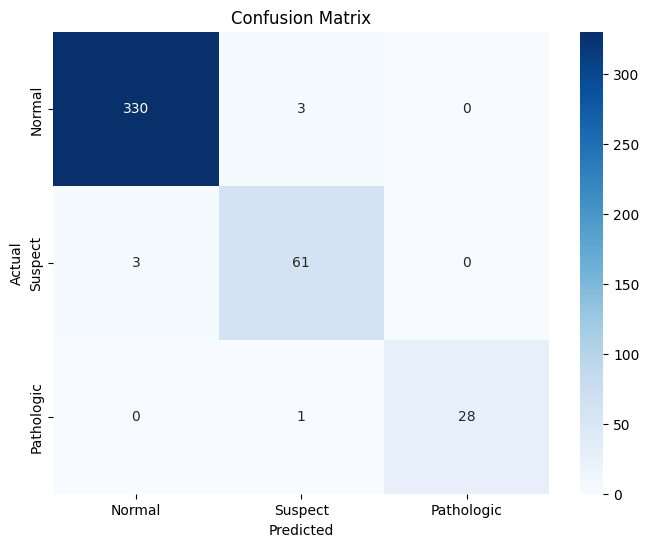

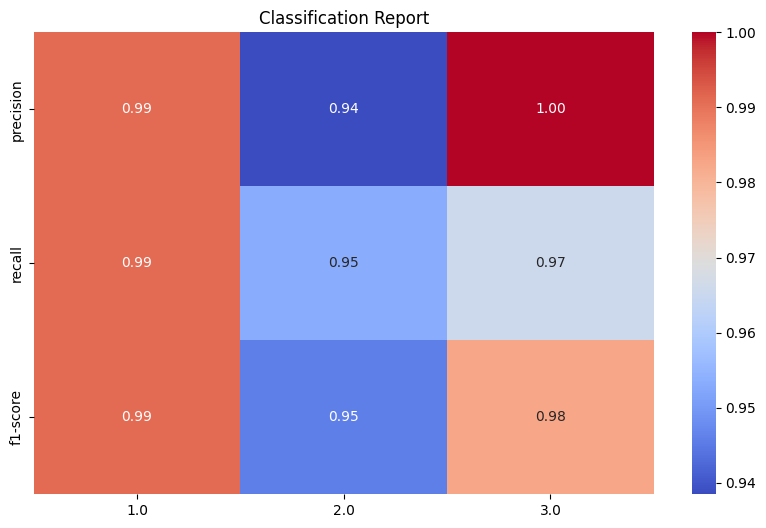

<ipython-input-22-a4f36c4c5e73>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=coefficients, y=feature_names, palette='viridis')


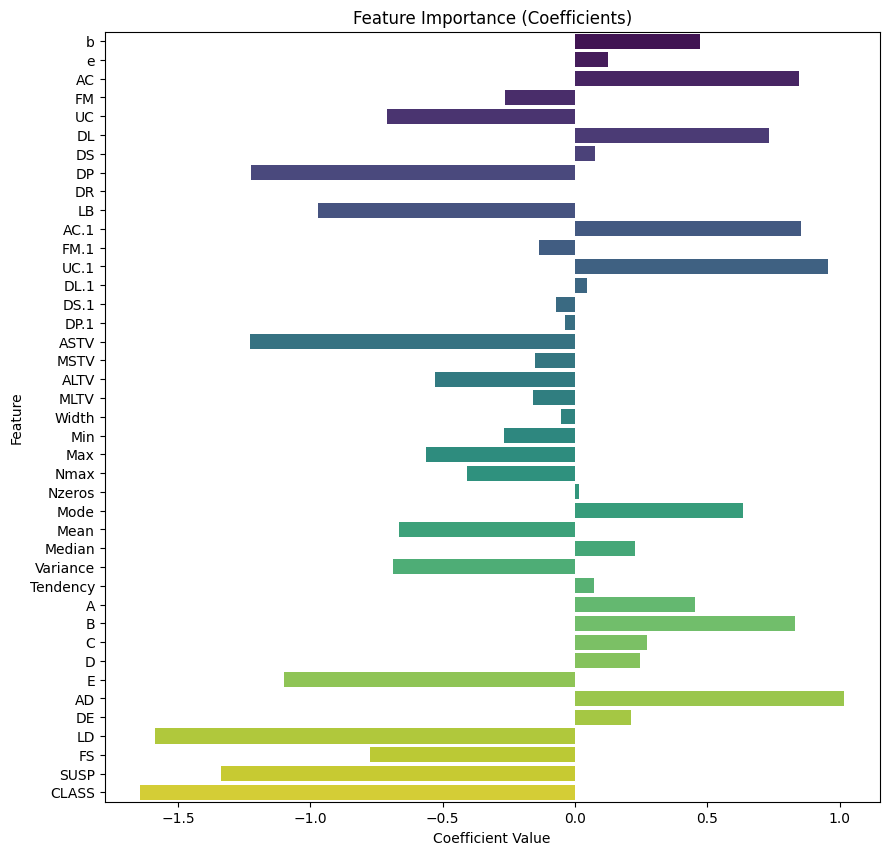

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Directory to save plots (ensure this exists or adapt as needed)
output_dir = "/content/plots/"  # Replace with your desired directory

# Confusion Matrix Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Suspect', 'Pathologic'],
            yticklabels=['Normal', 'Suspect', 'Pathologic'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
conf_matrix_path = f"{output_dir}confusion_matrix.png"
plt.savefig(conf_matrix_path)
plt.show()

# Classification Report Heatmap
class_report_dict = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(class_report_dict).iloc[:-1, :3]  # Exclude 'accuracy' row and only take Normal, Suspect, Pathologic
plt.figure(figsize=(10, 6))
sns.heatmap(report_df, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Classification Report')
class_report_path = f"{output_dir}classification_report.png"
plt.savefig(class_report_path)
plt.show()

# Feature Importance Bar Plot
coefficients = model.coef_[0]  # Logistic Regression coefficients for the first class
feature_names = X.columns
plt.figure(figsize=(10, 6))
sns.barplot(x=coefficients, y=feature_names, palette='viridis')
plt.title('Feature Importance (Coefficients)')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
feature_importance_path = f"{output_dir}feature_importance.png"
plt.savefig(feature_importance_path)
plt.show()

print(f"Plots saved to:\n- {conf_matrix_path}\n- {class_report_path}\n- {feature_importance_path}")
